In [16]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [17]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [18]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, MetaData, Table

In [19]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [20]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
#Base.prepare(engine, reflect=True)
Base.prepare(autoload_with=engine)

In [21]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [22]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [23]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [24]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(measurement.date)).first()
most_recent_date

('2017-08-23',)

In [43]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

latest_date_str = session.query(measurement.date).order_by(measurement.date.desc()).first()[0]
latest_date = dt.datetime.strptime(latest_date_str, '%Y-%m-%d')
query_date = latest_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
sel = [measurement.date, measurement.prcp]
query_result = session.query(*sel).filter(measurement.date >= query_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names

precipitation = pd.DataFrame(query_result, columns=['Date', 'Precipitation'])

# Sort the dataframe by date

precipitation = precipitation.dropna().sort_values("Date").set_index("Date")
precipitation
precipitation.to_csv("Precipitation_csv")

<Figure size 1000x600 with 0 Axes>

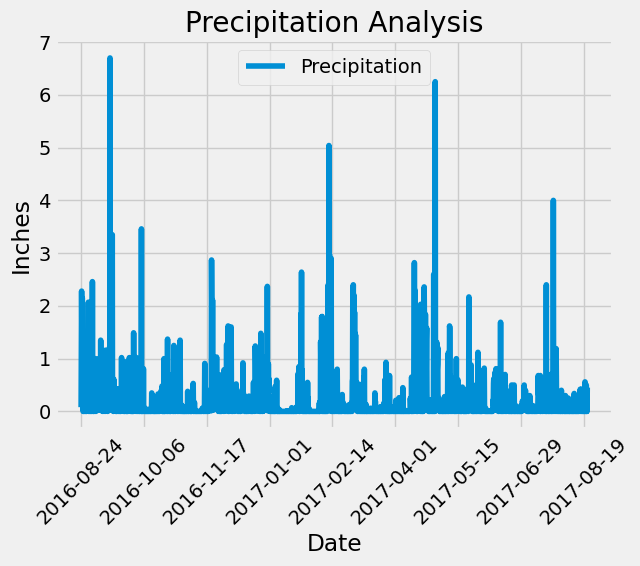

In [56]:

# Use Pandas Plotting with Matplotlib to plot the data


plt.figure(figsize=(10, 6))
precipitation.plot(rot=45)
plt.title("Precipitation Analysis")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.grid(True)
plt.savefig("/Users/Apple/Desktop/sqlalchemy-challenge/Resources/Precipitation_analysis.png")


plt.show()

In [57]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation .describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [58]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(station.id).count() 
station_count

9

In [59]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_activity = session.query(measurement.station, func.count(measurement.station)).\
group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [60]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_number = 'USC00516128'
session.query(func.min(measurement.tobs),
              func.max(measurement.tobs),
              func.avg(measurement.tobs)).filter(measurement.station == station_number).all()

[(58.0, 84.0, 70.91500765696784)]

<Figure size 1000x600 with 0 Axes>

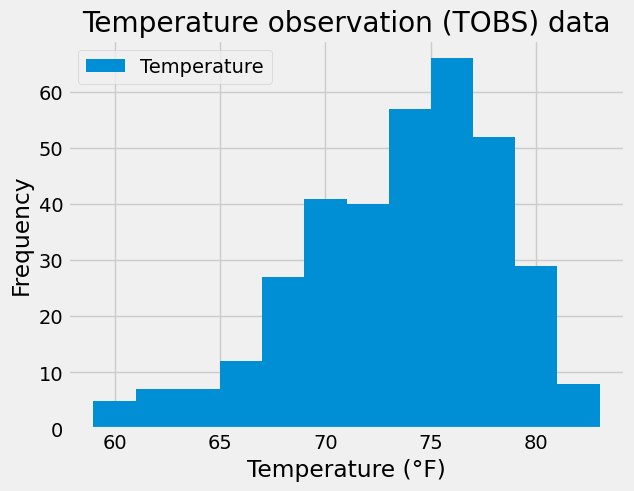

In [63]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Using the most active station ID
station_highest_obs = station_activity[0][0]

# Define the date range for the last 12 months
latest_date_str = session.query(measurement.date).order_by(measurement.date.desc()).first()[0]
latest_date = dt.datetime.strptime(latest_date_str, '%Y-%m-%d')
query_date = latest_date - dt.timedelta(days=365)

# Query the last 12 months of temperature observation data for this station
results = session.query(measurement.date, measurement.tobs).\
                  filter(measurement.date >= query_date).\
                  filter(measurement.date <= latest_date).\
                  filter(measurement.station == station_highest_obs).all()

# Convert to DataFrame
results_df = pd.DataFrame(results, columns=['Date', 'Temperature'])

# Plot the results as a histogram
plt.figure(figsize=(10, 6))
results_df.plot.hist(bins=12)
plt.title("Temperature observation (TOBS) data")
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")
plt.grid(True)

# Save the plot
plt.savefig("/Users/Apple/Desktop/sqlalchemy-challenge/Resources/Temperature_Observations_Histogram.png")

# Show the plot
plt.show()

# Close Session

In [64]:
# Close Session
session.close()